<a href="https://colab.research.google.com/github/Khaneul1/express-test/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%98%A4%EC%98%88%EB%B9%88_%EA%B3%A0%ED%95%98%EB%8A%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

np.random.seed(777)

In [2]:
#학습 및 검증할 테스트 셋 분할하기 (데이터 불러오기 단계)
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

원본 데이터 shape : (60000, 28, 28)


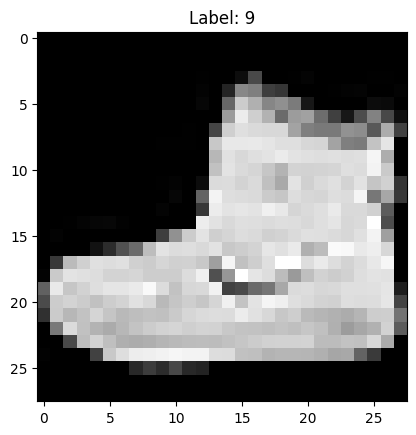

In [3]:
#데이터 차원 확인 및 예시 시각화
print('원본 데이터 shape :', train_x.shape) #(60000, 28, 28)
plt.imshow(train_x[0], cmap='gray')
plt.title(f"Label: {train_y[0]}")
plt.show()

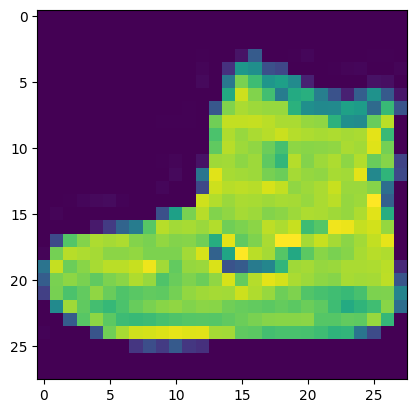

In [4]:
plt.imshow(train_x[0]) #이미지 확인 과정

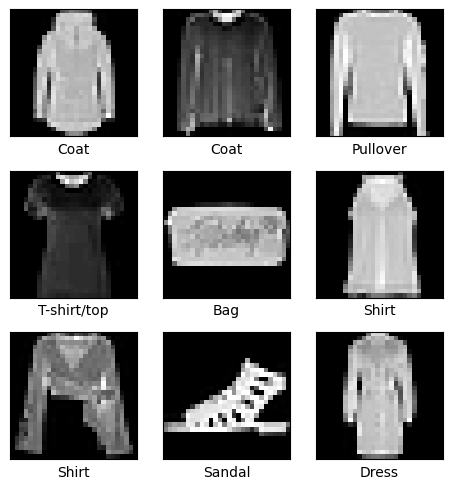

In [5]:
#분류 레이블 생성 후 데이터 그리기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke boot']
sample_size = 9
random_idx = np.random.randint(train_x.shape[0], size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_x[idx], cmap='gray')
  plt.xlabel(class_names[train_y[idx]])
  plt.tight_layout()
plt.show()

In [6]:
#1.값의 범위 조정 필요 (정규화하기)
train_x = train_x / 255.0
test_x = test_x / 255.0

#2.수치형을 범주형으로 변경
real_test_y = test_y

#레이블 데이터 -> 범주형 (원-핫 인코딩)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#3.훈련 및 검증 데이터, 테스트 셋으로 총 6:2:2 비율로 분할
#먼저 6 훈련, 4 임시 데이터로 나누기
x_train, x_temp, y_train, y_temp = train_test_split(
    train_x, train_y, test_size=0.4, random_state=777
)
#6:4 분할 (임시 데이터 5:5로 나눠서 검증/테스트용 분할)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=777
)

#CNN 입력 형태로 바꾸기 (28x28 -> 28x28x1로!!)
x_train = x_train.reshape(-1, 28,28,1)
x_val = x_val.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

#최종 데이터 형태
print("훈련 데이터 : ", x_train.shape, y_train.shape)
print("검증 데이터 : ", x_val.shape, y_val.shape)
print("테스트 데이터 : ", x_test.shape, y_test.shape)

훈련 데이터 :  (36000, 28, 28, 1) (36000, 10)
검증 데이터 :  (12000, 28, 28, 1) (12000, 10)
테스트 데이터 :  (12000, 28, 28, 1) (12000, 10)


In [7]:
train_x = train_x.reshape(-1, 28,28,1)
x_val = x_val.reshape(-1, 28,28,1)
test_x = test_x.reshape(-1, 28,28,1)

In [8]:
#컨볼루션 레이어 설정
from tensorflow.keras import models, layers
model = models.Sequential()

#첫 번째 레이어
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#두 번째 레이어
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() #모델 구조 출력해서 확인해 보기

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,410 (915.66 KB)

 Trainable params: 234,410 (915.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#CNN 만들기
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

es = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=10
    restore_best_weights=True
)

#학습용 데이터와 검증용 데이터 저장하기
history = model.fit(train_x, train_y, epochs=100, batch_size=128, validation_data=(x_val, y_val), callbacks=[es])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - accuracy: 0.6474 - loss: 0.9903 - val_accuracy: 0.8566 - val_loss: 0.4122
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.8380 - loss: 0.4507 - val_accuracy: 0.8772 - val_loss: 0.3571
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.8579 - loss: 0.3995 - val_accuracy: 0.8814 - val_loss: 0.3366
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.8688 - loss: 0.3714 - val_accuracy: 0.8930 - val_loss: 0.3058
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.8738 - loss: 0.3515 - val_accuracy: 0.8987 - val_loss: 0.2937
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.8783 - loss: 0.3381 - val_accuracy: 0.9009 - val_loss: 0.2826
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.8835 - loss: 0.3236 - val_accuracy: 0.9041 - val_loss: 0.2761
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.8865 -

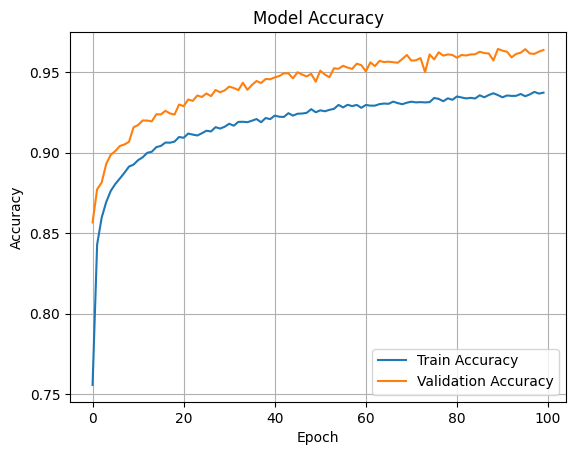

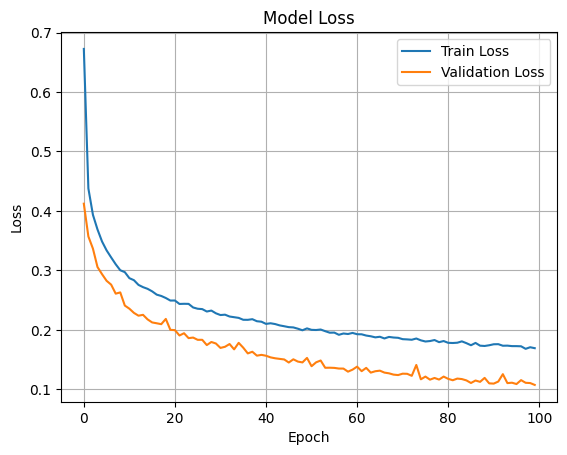

In [10]:
#학습 결과 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


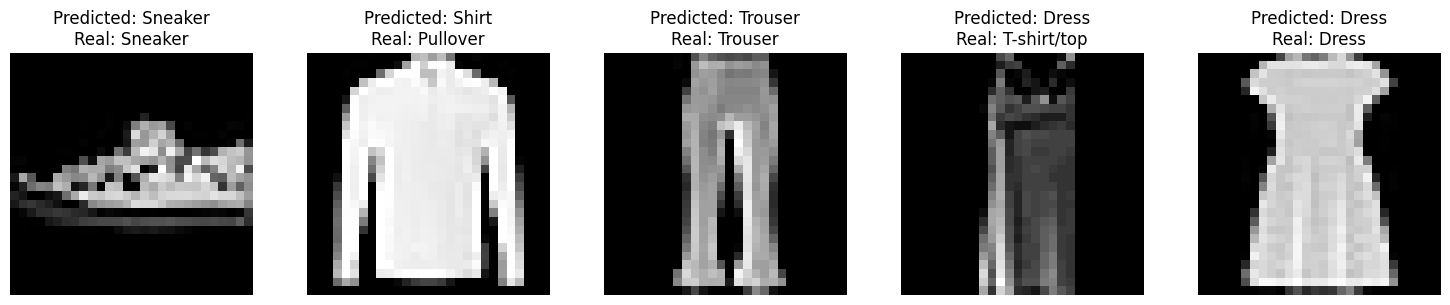

In [11]:
results = model.predict(test_x)
arg_results = np.argmax(results, axis=-1)

num_images = 5 #시각화할 이미지 개수! 우선 5개부터 시작
random_idxs = np.random.choice(len(test_x), num_images, replace=False) #랜덤으로 이미지를 하나 골라서 시각화
#중복 없이 랜덤으로 선택하고, 총 5개의 이미지 데이터를 시각화함

fig, axes = plt.subplots(1, num_images, figsize=(15,3))

for i, idx in enumerate(random_idxs):
  axes[i].imshow(test_x[idx].reshape(28,28), cmap='gray')
  axes[i].set_title(f'Predicted: {class_names[arg_results[idx]]}\nReal: {class_names[np.argmax(test_y[idx])]}')
  axes[i].axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


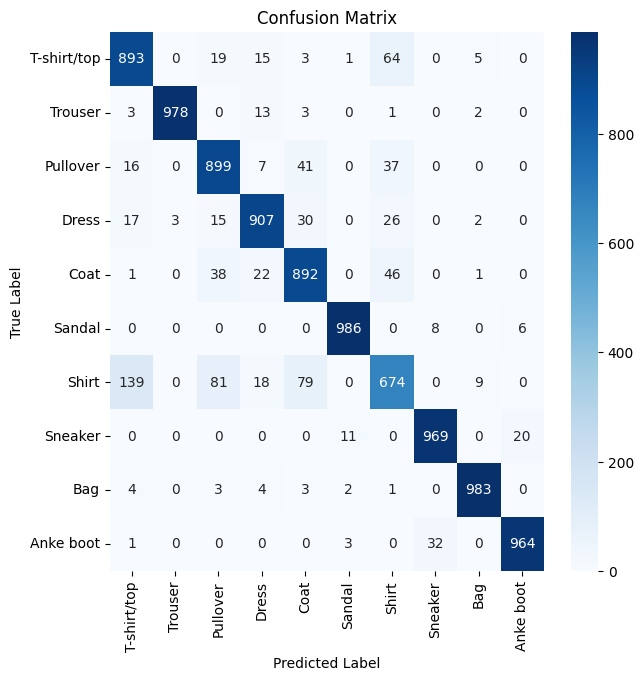

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.90      0.87      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.79      0.67      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
   Anke boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

#1. 모델 예측
results = model.predict(test_x)
predicted_labels = np.argmax(results, axis=1)
true_labels = np.argmax(test_y, axis=1) #train_y와 train_x가 원-핫 인코딩 되어 있기 때문에 정수형 라벨로 변환해 주기

#2. 혼동 행렬 계산 && 시각화
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#3. 분류 리포트 :: 정확도/정밀도/재현율
print(classification_report(true_labels, predicted_labels, target_names=class_names))